In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/corpus_france_gas.csv")
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df = df.sort_values(by=['date', 'time'])
df_cleaned = df.drop_duplicates(subset='body', keep='first')

In [3]:
df_cleaned

,uri,lang,isDuplicate,date,time,dateTime,dateTimePub,dataType,sim,url,...,source_uri,source_dataType,source_title,authors,sentiment,wgt,relevance,image,eventUri,datetime
34,2024-05-358335653,eng,False,2024-05-16,15:55:44,2024-05-16T15:55:44Z,2024-05-16T15:55:29Z,news,0.752941,https://www.criticalthreats.org/analysis/afric...,...,criticalthreats.org,news,Critical Threats,NaN,0.137255,453570944,4,https://www.criticalthreats.org/wp-content/upl...,eng-9566649,2024-05-16 15:55:44
23,8137097040,eng,False,2024-05-20,16:08:07,2024-05-20T16:08:07Z,2024-05-20T16:07:15Z,news,0.000000,https://www.marketscreener.com/quote/stock/ENE...,...,marketscreener.com,news,Market Screener,NaN,0.725490,453917287,5,https://www.marketscreener.com/images/twitter_...,NaN,2024-05-20 16:08:07
21,8137128556,eng,False,2024-05-20,16:32:24,2024-05-20T16:32:24Z,2024-05-20T16:31:11Z,news,0.000000,https://www.finanznachrichten.de/nachrichten-2...,...,finanznachrichten.de,news,FinanzNachrichten.de,NaN,0.725490,453918744,5,https://www.finanznachrichten.de/chart-enertim...,NaN,2024-05-20 16:32:24
25,8140780860,eng,False,2024-05-22,17:13:59,2024-05-22T17:13:59Z,2024-05-22T17:11:32Z,news,0.000000,https://ca.sports.yahoo.com/news/ctvn-wednesda...,...,ca.sports.yahoo.com,news,Yahoo Sports Canada,NaN,-0.223529,454094039,3,https://s.yimg.com/cv/apiv2/social/images/yaho...,NaN,2024-05-22 17:13:59
15,8146159184,eng,False,2024-05-26,04:56:32,2024-05-26T04:56:32Z,2024-05-26T04:48:37Z,news,0.000000,https://ca.sports.yahoo.com/news/cbcn-sunday-m...,...,ca.sports.yahoo.com,news,Yahoo Sports Canada,NaN,0.176471,454395392,2,https://s.yimg.com/cv/apiv2/social/images/yaho...,NaN,2024-05-26 04:56:32
14,8146832316,eng,False,2024-05-26,15:50:35,2024-05-26T15:50:35Z,2024-05-26T15:47:02Z,news,0.000000,https://ca.sports.yahoo.com/news/city24-sunday...,...,ca.sports.yahoo.com,news,Yahoo Sports Canada,NaN,0.019608,454434635,1,https://s.yimg.com/cv/apiv2/social/images/yaho...,NaN,2024-05-26 15:50:35
13,8146969063,eng,False,2024-05-26,18:10:20,2024-05-26T18:10:20Z,2024-05-26T18:07:04Z,news,0.000000,https://ca.sports.yahoo.com/news/city24-sunday...,...,ca.sports.yahoo.com,news,Yahoo Sports Canada,NaN,-0.129412,454443020,2,https://s.yimg.com/cv/apiv2/social/images/yaho...,NaN,2024-05-26 18:10:20
12,8146999182,eng,False,2024-05-26,18:41:04,2024-05-26T18:41:04Z,2024-05-26T18:39:48Z,news,0.000000,https://ca.sports.yahoo.com/news/city24-sunday...,...,ca.sports.yahoo.com,news,Yahoo Sports Canada,NaN,-0.356863,454444864,5,https://s.yimg.com/cv/apiv2/social/images/yaho...,NaN,2024-05-26 18:41:04
24,8147029720,eng,False,2024-05-26,19:16:23,2024-05-26T19:16:23Z,2024-05-26T19:15:11Z,news,0.000000,https://ca.sports.yahoo.com/news/cbcn-sunday-m...,...,ca.sports.yahoo.com,news,Yahoo Sports Canada,NaN,-0.027451,454446983,2,https://s.yimg.com/cv/apiv2/social/images/yaho...,NaN,2024-05-26 19:16:23
11,8147029718,eng,False,2024-05-26,19:19:20,2024-05-26T19:19:20Z,2024-05-26T19:15:11Z,news,0.000000,https://ca.sports.yahoo.com/news/city24-sunday...,...,ca.sports.yahoo.com,news,Yahoo Sports Canada,NaN,0.207843,454447160,3,https://s.yimg.com/cv/apiv2/social/images/yaho...,NaN,2024-05-26 19:19:20


In [24]:
t = df_cleaned['datetime'].tolist()
sentiment = df_cleaned['sentiment'].tolist()
relevance = df_cleaned['relevance'].tolist()

In [25]:
# Creation de la ligne des hausses/baisses
n = len(t)
hausse = [sentiment[k] * relevance[k] for k in range(0, n)]

In [26]:
# Creation de la serie de valeurs
valeurs = [hausse[0]]
for k in range(1, n) :
    valeurs.append(valeurs[k-1] + hausse[k])
valeurs

[0.5490196078431372,
 4.176470588235294,
 7.803921568627452,
 7.133333333333334,
 7.4862745098039225,
 7.505882352941177,
 7.247058823529413,
 5.462745098039217,
 5.407843137254903,
 6.031372549019609,
 6.109803921568628,
 5.529411764705883,
 6.862745098039216,
 7.768627450980393,
 8.847058823529412,
 8.682352941176472,
 8.576470588235296,
 7.878431372549021,
 7.827450980392158,
 8.03529411764706]

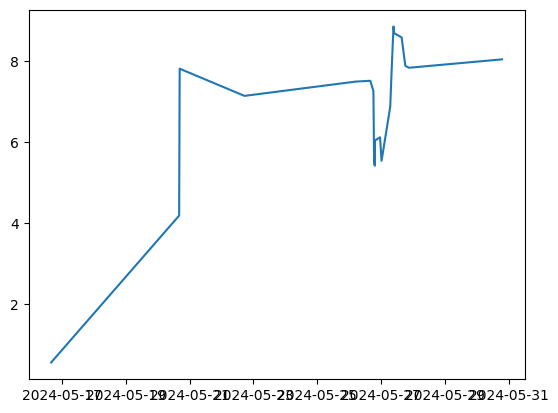

In [27]:
# Affichage 
plt.plot(t, valeurs, linestyle='-')

In [19]:
df = pd.read_csv("../corpus/big_corpus.csv")

In [21]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df = df.sort_values(by=['date', 'time'])
df_cleaned = df.drop_duplicates(subset='body', keep='first')
df

,uri,lang,isDuplicate,date,time,dateTime,dateTimePub,dataType,sim,url,...,source_uri,source_dataType,source_title,authors,sentiment,wgt,relevance,image,eventUri,datetime
57383,8111692373,eng,False,2024-05-05,00:10:42,2024-05-05T00:10:42Z,2024-05-05T00:08:25Z,news,0.000000,https://www.thetimes.co.uk/article/energy-gian...,...,thetimes.co.uk,news,The Sunday Times,Oliver Hodges,0.513725,452563842,5,https://www.thetimes.co.uk/imageserver/image/%...,NaN,2024-05-05 00:10:42
31289,8111745983,eng,False,2024-05-05,01:38:50,2024-05-05T01:38:50Z,2024-05-05T01:37:47Z,news,0.000000,https://www.usanews.net/breaking/the-europe-th...,...,usanews.net,news,USANews Press Release Network,NaN,0.364706,452569130,7,https://www.usanews.net/images/haberler/2024/0...,NaN,2024-05-05 01:38:50
28214,8111769198,eng,False,2024-05-05,02:17:39,2024-05-05T02:17:39Z,2024-05-05T02:16:34Z,news,0.000000,https://www.whatech.com/og/markets-research/ma...,...,whatech.com,news,WhaTech,Insightace Analytic,0.247059,452571459,1,NaN,NaN,2024-05-05 02:17:39
28213,8111775685,eng,False,2024-05-05,02:30:09,2024-05-05T02:30:09Z,2024-05-05T02:28:48Z,news,0.698039,https://www.cambridge-news.co.uk/news/cost-of-...,...,cambridge-news.co.uk,news,Cambridge News Online,"David Bentley, Cait Findlay",0.380392,452572209,4,https://i2-prod.cambridge-news.co.uk/news/cost...,eng-9540757,2024-05-05 02:30:09
28212,8111838364,eng,False,2024-05-05,04:05:12,2024-05-05T04:05:12Z,2024-05-05T04:04:10Z,news,0.000000,https://www.irishtimes.com/property/interiors/...,...,irishtimes.com,news,The Irish Times,NaN,0.223529,452577912,4,https://www.irishtimes.com/resizer/ZD8iiDA_VKo...,NaN,2024-05-05 04:05:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2024-05-375010445,eng,False,2024-05-31,23:55:17,2024-05-31T23:55:17Z,2024-05-31T12:28:50Z,news,0.627451,https://www.yahoo.com/news/us-china-military-r...,...,yahoo.com,news,Yahoo,Tom Porter,-0.043137,454895717,2,https://media.zenfs.com/en/business_insider_ar...,eng-9607060,2024-05-31 23:55:17
11001,2024-05-375010445,eng,False,2024-05-31,23:55:17,2024-05-31T23:55:17Z,2024-05-31T12:28:50Z,news,0.627451,https://www.yahoo.com/news/us-china-military-r...,...,yahoo.com,news,Yahoo,Tom Porter,-0.043137,454895717,3,https://media.zenfs.com/en/business_insider_ar...,eng-9607060,2024-05-31 23:55:17
4000,8155890515,eng,False,2024-05-31,23:56:57,2024-05-31T23:56:57Z,2024-05-31T23:55:50Z,news,0.000000,https://punchng.com/demands-of-endsars-protest...,...,punchng.com,news,Punch Newspapers,Godfrey George,-0.050980,454895817,9,https://cdn.punchng.com/wp-content/uploads/202...,NaN,2024-05-31 23:56:57
5000,2024-05-375011834,eng,True,2024-05-31,23:57:59,2024-05-31T23:57:59Z,2024-05-31T23:32:06Z,news,0.000000,https://www.maryvilleforum.com/news/state_news...,...,maryvilleforum.com,news,The Maryville Forum,NaN,0.443137,454895879,1,https://bloximages.chicago2.vip.townnews.com/m...,NaN,2024-05-31 23:57:59
